# Normalize Data


- There are namy ways of quantizing (normalizing) the data
- The most popular is to normalize data in the range of 0 to 1
- I chose to represent data as Int8 (-128,127) because of the currently available 4 TOPS TPU ([Google Coral](https://www.amazon.com/s?k=Google+Coral&ref=bl_dp_s_web_0)) using [TensorFlow Lite](https://coral.ai/docs/edgetpu/models-intro/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-1">Normalize Data</a></span></li><li><span><a href="#Fetch-DataFrame-from-the-CSV-file" data-toc-modified-id="Fetch-DataFrame-from-the-CSV-file-2">Fetch DataFrame from the CSV file</a></span></li><li><span><a href="#Explore-the-Dataset" data-toc-modified-id="Explore-the-Dataset-3">Explore the Dataset</a></span><ul class="toc-item"><li><span><a href="#Describe-the-original-data" data-toc-modified-id="Describe-the-original-data-3.1">Describe the original data</a></span></li></ul></li><li><span><a href="#Function-to-normalize-the-data" data-toc-modified-id="Function-to-normalize-the-data-4">Function to normalize the data</a></span><ul class="toc-item"><li><span><a href="#Quantaize" data-toc-modified-id="Quantaize-4.1">Quantaize</a></span></li></ul></li><li><span><a href="#Plot-graphically" data-toc-modified-id="Plot-graphically-5">Plot graphically</a></span><ul class="toc-item"><li><span><a href="#Number-the-column-names" data-toc-modified-id="Number-the-column-names-5.1">Number the column names</a></span></li><li><span><a href="#Draw-plots" data-toc-modified-id="Draw-plots-5.2">Draw plots</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-the-CSV-file" data-toc-modified-id="Save-DataFrame-to-the-CSV-file-6">Save DataFrame to the CSV file</a></span><ul class="toc-item"><li><span><a href="#Select-only-the-columns-you-want-to-save" data-toc-modified-id="Select-only-the-columns-you-want-to-save-6.1">Select only the columns you want to save</a></span></li><li><span><a href="#Save" data-toc-modified-id="Save-6.2">Save</a></span></li></ul></li></ul></div>

# Fetch DataFrame from the CSV file

In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05
show_help = true
include("dataset_IO.jl") 


        usage:
              show_help = true
              include("dataset_IO.jl") 
    

        usage:
              # returns a DataFrame with all available data sets (name, file_path)
              df = available_datasets() 
    

        usage: 
              # 5th dataset: DJIA, 
              # 2nd column: file-name
              dataset_file_name = available_datasets()[5,2] 
    

        usage: 
              df = fetch_dataset(
                                 dataset_file_name, 
                                 date_format="u/dd/yy", # format the saved dates are in
                                 dir="/mnt/data/indicators/original/" ) # location of your data directory
    

        usage: 
              include("dataset_IO.jl") 
              file_path = save_dataset(
                                       df::DataFrame,
                                       file_name="my_file_name.csv", 
                                       dir="/mnt/data/indicators/derived/" ) # loc

In [2]:
dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv

df = fetch_dataset(dataset_file_name, date_format)

size(df)

(254, 7)

# Explore the Dataset

## Describe the original data

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,2019-09-17,,2020-09-17,254,,String
2,Open,50.2519,37.11,49.17,65.53,,,Float64
3,High,50.2519,37.11,49.17,65.53,,,Float64
4,Low,50.2519,37.11,49.17,65.53,,,Float64
5,Close,50.2519,37.11,49.17,65.53,,,Float64
6,Adj Close,50.1811,37.11,49.17,65.53,,,Float64
7,Volume,0.0,0,0.0,0,,,Int64


# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

OR 

$$ x_i = \frac{(x_i - μ)}{σ} $$

where:
- μ  - **mean** of the whole population
- σ - **standard deviation** of the whole population

## Quantaize

In [4]:
data_original = df[:,6] # keep original for display comparison later

include("quantize.jl")
quantize_column!(df, 6)

using Statistics 
describe(df)[6,:]

bias for 0 value: -1.3057707111731671
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 37.110001
maximum = 65.529999
Save these values for later to run model preditions


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
6,Adj Close,-10.7323,-128.0,-20.0,127.0,,,Float64


# Plot graphically

## Number the column names

In [5]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


## Draw plots

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

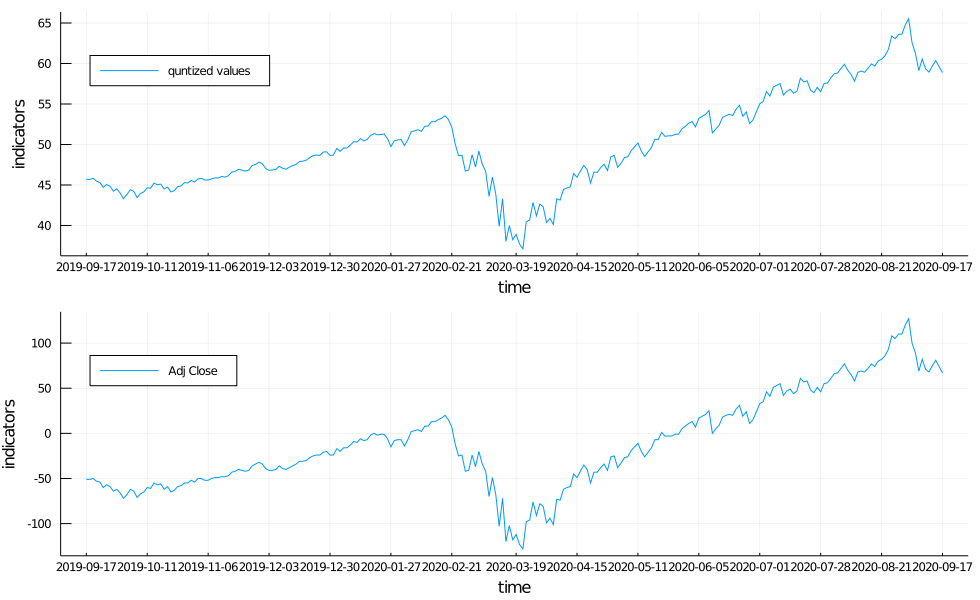

In [6]:
using Plots

rows = 1:254
gr()
plot(          df[ rows,1 ], # x-axis: dates
               [  data_original         df[rows,6]   ], # y-axis
    label    = ["quntized values" columns[6]]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 600), # width, height
    layout = (2, 1) # number of graphs: vertically, horizontally
    )

# Save DataFrame to the CSV file

## Select only the columns you want to save

In [7]:
using DataFrames

#names!(df, [Symbol("column_$i") for i in 1:7])
#df1 = df[ [:column_1, :column_6 ], ]

println(names(df))
df1 = df[ [:Date, Symbol("Adj Close") ], ] # use Symbol if name of the columnm includes spaces

["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]


,Date,Adj Close
,String,Float64
1,2019-09-17,-51.0
2,2019-09-18,-51.0
3,2019-09-19,-50.0
4,2019-09-20,-53.0
5,2019-09-23,-54.0
6,2019-09-24,-60.0
7,2019-09-25,-57.0
8,2019-09-26,-59.0
9,2019-09-27,-64.0


## Save

In [8]:
# NOTE: to over-write, the file cannot be opened, i.e. in the spreadsheet software

using CSV, DataFrames
file_path = save_dataset(df1, dataset_file_name)

"D:\\Drive\\market_indicators_data\\derived\\TPLGX.csv"